___
# Crimes in India
___

## Primary Questions to be answered from this dataset
* What is the major reason people being kidnapped in each and every state?
* Offenders relation to the rape victim
* Juveniles family background, education and economic setup.
* Which state has more crime against children and women?
* Age group wise murder victim
* Crime by place of occurrence.
* Anti corruption cases vs arrests.
* Which state has more number of complaints against police?
* Which state is the safest for foreigners?


In [ ]:
# download the directory of the datasets from the google drive...

In [ ]:
# Mount the Google Drive on Colab
# { Mount sucessfull}

In [ ]:
# unzip the directory
!unzip crimes_in_india.zip

Archive:  crimes_in_india.zip
  inflating: 10_Property_stolen_and_recovered.csv  
  inflating: 20_Victims_of_rape.csv  
  inflating: 25_Complaints_against_police.csv  
  inflating: 28_Trial_of_violent_crimes_by_courts.csv  
  inflating: 29_Period_of_trials_by_courts.csv  
  inflating: 30_Auto_theft.csv       
  inflating: 31_Serious_fraud.csv    
  inflating: 32_Murder_victim_age_sex.csv  
  inflating: 33_CH_not_murder_victim_age_sex.csv  
  inflating: 35_Human_rights_violation_by_police.csv  
  inflating: 36_Police_housing.csv   
  inflating: 39_Specific_purpose_of_kidnapping_and_abduction.csv  
  inflating: 40_01_Custodial_death_person_remanded.csv  
  inflating: 40_02_Custodial_death_person_not_remanded.csv  
  inflating: 40_03_Custodial_death_during_production.csv  
  inflating: 40_04_Custodial_death_during_hospitalization_or_treatment.csv  
  inflating: 40_05_Custodial_death_others.csv  
  inflating: 42_Cases_under_crime_against_women.csv  
  inflating: 43_Arrests_under_crime_agai

In [ ]:
# importing the project dependencies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats

 Question no 1:
* Which is the major reason for kidnapping in each and every state?

In [ ]:
df = pd.read_csv('/content/39_Specific_purpose_of_kidnapping_and_abduction.csv')

In [ ]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# number of samples in this dataset
len(df)

3569

In [ ]:
# number of features in this dataset
len(df.columns)

20

In [ ]:
# shape of the dataset
df.shape

(3569, 20)

In [ ]:
# count the total number of unique area_names in this dataset
len(df.Area_Name.value_counts())

35

In [ ]:
df.Area_Name.value_counts()

Gujarat                      140
Odisha                       140
West Bengal                  140
Meghalaya                    140
Andhra Pradesh               140
Maharashtra                  140
Karnataka                    140
Chhattisgarh                 140
Himachal Pradesh             140
Nagaland                     140
Assam                        135
Madhya Pradesh               135
Bihar                        134
Tamil Nadu                   134
Arunachal Pradesh            130
Jammu & Kashmir              127
Haryana                      125
Jharkhand                    116
Mizoram                      108
Punjab                       107
Manipur                      107
Uttar Pradesh                106
Delhi                         89
Chandigarh                    84
Kerala                        84
Rajasthan                     79
Tripura                       72
Uttarakhand                   58
Puducherry                    57
Goa                           44
Daman & Di

In [ ]:
# the area name are acutally the names of the states and the union territories of the country

In [ ]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,Tamil Nadu,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),1720.0,41.0,431.0,874.0,103.0,5.0,1467.0,13.0,1726.0,5.0,2.0,89.0,145.0,11.0,259.0,7.0
3565,Tripura,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),114.0,8.0,11.0,57.0,18.0,0.0,94.0,NaN,130.0,2.0,0.0,17.0,15.0,1.0,36.0,1.0
3566,Uttar Pradesh,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),6321.0,169.0,906.0,3682.0,699.0,0.0,5468.0,12.0,6323.0,59.0,48.0,460.0,247.0,10.0,855.0,31.0
3567,Uttarakhand,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),286.0,NaN,1.0,217.0,31.0,NaN,249.0,NaN,286.0,3.0,5.0,25.0,4.0,NaN,37.0,NaN


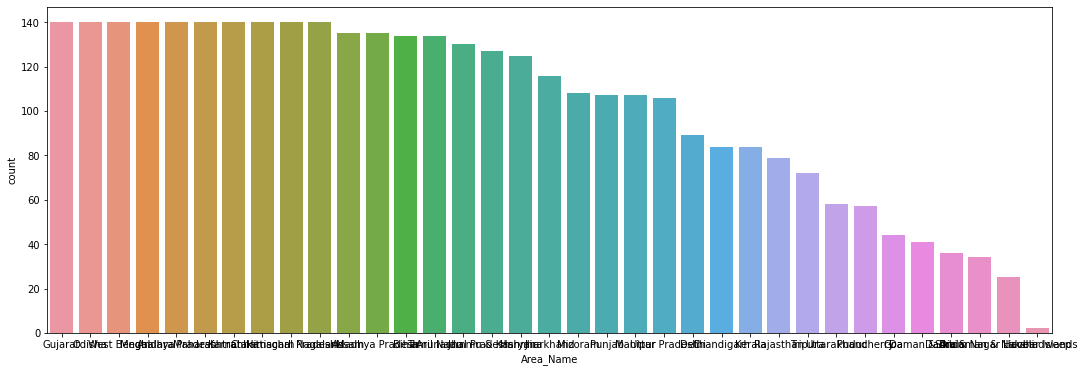

In [ ]:
# a count plot for the filed cases as per the States and UT's
plt.figure(figsize=(18,6))
sns.countplot(df.Area_Name,order = df.Area_Name.value_counts().index)

In [ ]:
# plotly provides more interpretable and interactive plots.
px.bar(df,df.Area_Name.value_counts().index,list(df.Area_Name.value_counts()))

In [ ]:
# the maximum of 140 cases are recorded in this dataset from the year 2001 to 2010

In [ ]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# let's get the total number of groups and total number of subgroups
df.Group_Name.unique(),len(df.Group_Name.unique())

(array(['Kidnap - For Adoption', 'Kidnap - For Begging',
        'Kidnap - For Camel Racing', 'Kidnap - For Illicit Intercourse',
        'Kidnap - For Marriage', 'Kidnap - For Prostitution',
        'Kidnap - For Ransom', 'Kidnap - For Revenge', 'Kidnap - For Sale',
        'Kidnap - For Selling Bodyparts', 'Kidnap - For Slavery',
        'Kidnap - For Unlawful Activity', 'Kidnap - For Other Purposes',
        'Kidnap - Total'], dtype=object), 14)

In [ ]:
df.Sub_Group_Name.unique(),len(df.Sub_Group_Name.unique())

(array(['01. For Adoption', '02. For Begging', '03. for Camel Racing',
        '04. For Illicit Intercourse', '05. For Marriage',
        '06. For Prostitution', '07. For Ransom', '08. For Revenge',
        '09. For Sale', '10. For Selling Bodyparts', '11. For Slavery',
        '12. For Unlawful Activity', '13. Other Purposes',
        '14. Total (Sum of 1-13 Above)'], dtype=object), 14)

In [ ]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
3564,Tamil Nadu,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),1720.0,41.0,431.0,874.0,103.0,5.0,1467.0,13.0,1726.0,5.0,2.0,89.0,145.0,11.0,259.0,7.0
3565,Tripura,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),114.0,8.0,11.0,57.0,18.0,0.0,94.0,NaN,130.0,2.0,0.0,17.0,15.0,1.0,36.0,1.0
3566,Uttar Pradesh,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),6321.0,169.0,906.0,3682.0,699.0,0.0,5468.0,12.0,6323.0,59.0,48.0,460.0,247.0,10.0,855.0,31.0
3567,Uttarakhand,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),286.0,NaN,1.0,217.0,31.0,NaN,249.0,NaN,286.0,3.0,5.0,25.0,4.0,NaN,37.0,NaN
3568,West Bengal,2010,Kidnap - Total,14. Total (Sum of 1-13 Above),3345.0,50.0,211.0,1573.0,840.0,98.0,2786.0,14.0,3391.0,24.0,23.0,284.0,229.0,35.0,605.0,10.0


In [ ]:
df.sample(20)

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
1259,Chandigarh,2001,Kidnap - For Prostitution,06. For Prostitution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3333,Arunachal Pradesh,2004,Kidnap - Total,14. Total (Sum of 1-13 Above),65.0,8.0,0.0,33.0,0.0,0.0,41.0,0.0,65.0,0.0,0.0,18.0,6.0,0.0,24.0,0.0
1875,Uttar Pradesh,2004,Kidnap - For Revenge,08. For Revenge,271.0,1.0,1.0,1.0,2.0,0.0,5.0,0.0,271.0,14.0,33.0,135.0,68.0,11.0,266.0,5.0
450,Manipur,2010,Kidnap - For Begging,02. For Begging,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1657,Bihar,2007,Kidnap - For Ransom,07. For Ransom,81.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,81.0,10.0,11.0,39.0,9.0,2.0,78.0,7.0
362,Maharashtra,2006,Kidnap - For Begging,02. For Begging,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2725,Tamil Nadu,2003,Kidnap - For Unlawful Activity,12. For Unlawful Activity,28.0,1.0,0.0,0.0,4.0,1.0,7.0,1.0,35.0,0.0,3.0,9.0,10.0,5.0,28.0,1.0
3103,Chandigarh,2007,Kidnap - For Other Purposes,13. Other Purposes,7.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,9.0,0.0,1.0,4.0,0.0,0.0,7.0,2.0
3318,Manipur,2003,Kidnap - Total,14. Total (Sum of 1-13 Above),120.0,6.0,20.0,43.0,2.0,0.0,71.0,0.0,138.0,0.0,0.0,18.0,45.0,4.0,67.0,0.0
1008,Himachal Pradesh,2003,Kidnap - For Marriage,05. For Marriage,79.0,3.0,15.0,49.0,4.0,0.0,71.0,0.0,80.0,1.0,2.0,6.0,0.0,0.0,9.0,0.0


In [ ]:
df.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [ ]:
# note the the group names and the subgroup names are the same except for the `Total` attribute

In [ ]:
# Lets create a dataframe which will count the Group_Names with respect to Stats and UTs
df_kidnap = df[['Area_Name','Group_Name','K_A_Cases_Reported']]

In [ ]:
df_kidnap

,Area_Name,Group_Name,K_A_Cases_Reported
0,Andhra Pradesh,Kidnap - For Adoption,8.0
1,Arunachal Pradesh,Kidnap - For Adoption,0.0
2,Assam,Kidnap - For Adoption,0.0
3,Bihar,Kidnap - For Adoption,18.0
4,Chandigarh,Kidnap - For Adoption,0.0
...,...,...,...
3564,Tamil Nadu,Kidnap - Total,1720.0
3565,Tripura,Kidnap - Total,114.0
3566,Uttar Pradesh,Kidnap - Total,6321.0
3567,Uttarakhand,Kidnap - Total,286.0


In [ ]:
# Strip some unwanted characters from the string sof the colums Group_Name

In [ ]:
df_kidnap.loc[:,'Group_Name'] = df_kidnap.loc[:,'Group_Name'].str.lstrip(to_strip='Kidnap - For')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
counter = 0
Group_Name_dict = {}

for i in enumerate(df_kidnap.Group_Name.value_counts().index):
  Group_Name_dict[i[0]] = i[1]
  counter +=1


In [ ]:
Group_Name_dict

{0: 'Total',
 1: 'Other Purposes',
 2: 'Marriage',
 3: 'Ransom',
 4: 'Illicit Intercourse',
 5: 'Revenge',
 6: 'Unlawful Activity',
 7: 'Adoption',
 8: 'Prostitution',
 9: 'Begging',
 10: 'Sale',
 11: 'Slavery',
 12: 'Camel Racing',
 13: 'Selling Bodyparts'}

In [ ]:
df_kidnap

,Area_Name,Group_Name,K_A_Cases_Reported
0,Andhra Pradesh,Adoption,8.0
1,Arunachal Pradesh,Adoption,0.0
2,Assam,Adoption,0.0
3,Bihar,Adoption,18.0
4,Chandigarh,Adoption,0.0
...,...,...,...
3564,Tamil Nadu,Total,1720.0
3565,Tripura,Total,114.0
3566,Uttar Pradesh,Total,6321.0
3567,Uttarakhand,Total,286.0


In [ ]:
# let's drop the total  values attribute for the time being

In [ ]:
df_kidnap = df_kidnap[ df_kidnap.Group_Name != 'Total']

In [ ]:
df_kidnap[df_kidnap.Area_Name == 'Arunachal Pradesh']

,Area_Name,Group_Name,K_A_Cases_Reported
1,Arunachal Pradesh,Adoption,0.0
48,Arunachal Pradesh,Adoption,0.0
72,Arunachal Pradesh,Adoption,0.0
94,Arunachal Pradesh,Adoption,2.0
119,Arunachal Pradesh,Adoption,0.0
...,...,...,...
3066,Arunachal Pradesh,Other Purposes,26.0
3100,Arunachal Pradesh,Other Purposes,15.0
3134,Arunachal Pradesh,Other Purposes,34.0
3167,Arunachal Pradesh,Other Purposes,33.0


In [ ]:
df_kidnap_pivot = df_kidnap.pivot_table('K_A_Cases_Reported','Area_Name','Group_Name')

In [ ]:
df_kidnap_pivot

Group_Name,Adoption,Begging,Camel Racing,Illicit Intercourse,Marriage,Other Purposes,Prostitution,Ransom,Revenge,Sale,Selling Bodyparts,Slavery,Unlawful Activity
Area_Name,,,,,,,,,,,,,
Andaman & Nicobar Islands,NaN,NaN,NaN,NaN,1.500000,6.888889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andhra Pradesh,2.000000,4.000000,0.3,119.000,590.000000,740.500000,41.000000,19.000000,51.500000,3.600000,0.000000,10.500000,140.100000
Arunachal Pradesh,0.222222,0.000000,0.0,3.900,34.900000,23.800000,0.888889,3.000000,1.111111,0.000000,0.000000,0.000000,1.000000
Assam,0.666667,1.666667,0.0,137.700,1255.500000,418.800000,48.700000,59.700000,42.500000,6.600000,0.222222,7.888889,57.400000
Bihar,25.600000,0.555556,0.0,60.900,1138.400000,1114.900000,2.000000,242.200000,88.400000,1.555556,0.375000,8.200000,131.700000
Chandigarh,0.000000,0.200000,0.0,0.000,33.400000,12.900000,0.250000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
Chhattisgarh,1.200000,1.100000,0.0,16.600,128.800000,82.300000,7.800000,3.300000,0.500000,0.300000,0.100000,0.000000,0.300000
Dadra & Nagar Haveli,1.000000,NaN,NaN,NaN,6.500000,4.900000,NaN,1.500000,1.000000,NaN,NaN,NaN,NaN
Daman & Diu,0.000000,0.000000,0.0,0.000,0.500000,2.125000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000


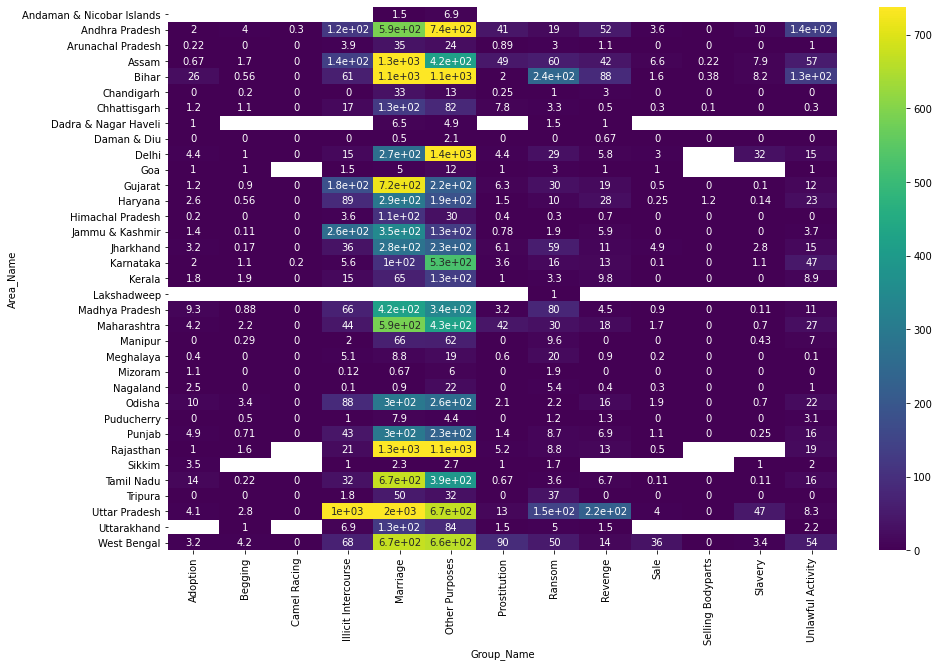

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_kidnap_pivot,annot=True,robust=True,cmap='viridis')

In [ ]:
df_kidnap_pivot.idxmax(axis=1)

Area_Name
Andaman & Nicobar Islands    Other Purposes
Andhra Pradesh               Other Purposes
Arunachal Pradesh                  Marriage
Assam                              Marriage
Bihar                              Marriage
Chandigarh                         Marriage
Chhattisgarh                       Marriage
Dadra & Nagar Haveli               Marriage
Daman & Diu                  Other Purposes
Delhi                        Other Purposes
Goa                          Other Purposes
Gujarat                            Marriage
Haryana                            Marriage
Himachal Pradesh                   Marriage
Jammu & Kashmir                    Marriage
Jharkhand                          Marriage
Karnataka                    Other Purposes
Kerala                       Other Purposes
Lakshadweep                          Ransom
Madhya Pradesh                     Marriage
Maharashtra                        Marriage
Manipur                            Marriage
Meghalaya             

In [ ]:
kidnap_for_df = pd.DataFrame(df_kidnap_pivot.idxmax(axis=1),columns=['major_kidnapping_reason'])

In [ ]:
kidnap_for_df

,major_kidnapping_reason
Area_Name,
Andaman & Nicobar Islands,Other Purposes
Andhra Pradesh,Other Purposes
Arunachal Pradesh,Marriage
Assam,Marriage
Bihar,Marriage
Chandigarh,Marriage
Chhattisgarh,Marriage
Dadra & Nagar Haveli,Marriage
Daman & Diu,Other Purposes


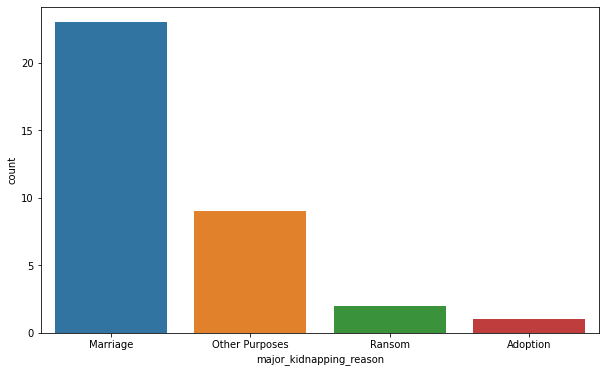

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(kidnap_for_df['major_kidnapping_reason'],order = kidnap_for_df['major_kidnapping_reason'].value_counts().index)

In [ ]:
# we can see that most of the Kidnapping in the Nation is for Marriages.

___
___
___

Question 2:
* Offenders relation to the rape victim

Question 3:
* Juveniles family background, education and economic setup.

In [ ]:
juv_fam_bg = pd.read_csv('/content/crime/18_03_Juveniles_arrested_Family_background.csv')
juv_edu = pd.read_csv('/content/crime/18_01_Juveniles_arrested_Education.csv')
juv_ec_setup = pd.read_csv('/content/crime/18_02_Juveniles_arrested_Economic_setup.csv')

In [ ]:
juv_fam_bg.head()

,Area_Name,Year,Sub_Group_Name,Family_back_ground_Homeless,Family_back_ground_Living_with_guardian,Family_back_ground_Living_with_parents,Family_back_ground_Total
0,Andaman & Nicobar Islands,2001,3. Family Background,0,0,16,16
1,Andhra Pradesh,2001,3. Family Background,552,287,726,1565
2,Arunachal Pradesh,2001,3. Family Background,0,58,79,137
3,Assam,2001,3. Family Background,21,74,158,253
4,Bihar,2001,3. Family Background,43,101,442,586


In [ ]:
juv_edu.head()

,Area_Name,Year,Sub_Group_Name,Education_Above_Primary_but_below_Matric_or_Higher_Secondary,Education_Illiterate,Education_Matric_or_Higher_Secondary_&_above,Education_Total,Education_Upto_primary
0,Andaman & Nicobar Islands,2001,1. Education,12,0,0,16,4
1,Andhra Pradesh,2001,1. Education,178,640,64,1565,683
2,Arunachal Pradesh,2001,1. Education,39,16,12,137,70
3,Assam,2001,1. Education,74,91,0,253,88
4,Bihar,2001,1. Education,87,190,56,586,253


In [ ]:
juv_ec_setup.head()

,Area_Name,Year,Sub_Group_Name,Economic_Set_up_Annual_Income_250001_to_50000,Economic_Set_up_Annual_Income_upto_Rs_25000,Economic_Set_up_Middle_income_from_100001_to_200000,Economic_Set_up_Middle_income_from_50001_to_100000,Economic_Set_up_Total,Economic_Set_up_Upper_income_above_Rs_300000,Economic_Set_up_Upper_middle_income_from_200001_to_300000
0,Andaman & Nicobar Islands,2001,2. Economic Setup,12,4,0,0,16,0,0
1,Andhra Pradesh,2001,2. Economic Setup,104,1421,9,27,1565,4,0
2,Arunachal Pradesh,2001,2. Economic Setup,38,99,0,0,137,0,0
3,Assam,2001,2. Economic Setup,47,177,13,16,253,0,0
4,Bihar,2001,2. Economic Setup,213,303,12,58,586,0,0


In [ ]:
# let's start with family background.

In [ ]:
juv_fam_bg.sample(10)

,Area_Name,Year,Sub_Group_Name,Family_back_ground_Homeless,Family_back_ground_Living_with_guardian,Family_back_ground_Living_with_parents,Family_back_ground_Total
179,Bihar,2006,3. Family Background,10,23,206,239
45,Goa,2002,3. Family Background,3,5,60,68
238,Rajasthan,2007,3. Family Background,25,200,1899,2124
3,Assam,2001,3. Family Background,21,74,158,253
280,Andaman & Nicobar Islands,2009,3. Family Background,0,3,35,38
348,Uttarakhand,2010,3. Family Background,42,2,110,154
329,Jammu & Kashmir,2010,3. Family Background,0,1,26,27
166,Puducherry,2005,3. Family Background,0,0,42,42
168,Rajasthan,2005,3. Family Background,33,256,1669,1958
41,Chhattisgarh,2002,3. Family Background,83,207,1117,1407


In [ ]:
# let's drop the total and year columns as we will consider the cummulative records from 2001 to 2010.
juv_fam_bg.drop(['Year','Sub_Group_Name'],1,inplace=True)

In [ ]:
juv_fam_bg = juv_fam_bg.groupby('Area_Name').agg(['sum']).reset_index()

In [ ]:
juv_fam_bg.columns = juv_fam_bg.columns.droplevel(level=1)

In [ ]:
juv_fam_bg

,Area_Name,Family_back_ground_Homeless,Family_back_ground_Living_with_guardian,Family_back_ground_Living_with_parents,Family_back_ground_Total
0,Andaman & Nicobar Islands,0,37,302,339
1,Andhra Pradesh,5234,3061,11619,19914
2,Arunachal Pradesh,1,505,687,1193
3,Assam,647,1624,2682,4953
4,Bihar,553,1256,5062,6871
5,Chandigarh,35,55,1087,1177
6,Chhattisgarh,765,3125,18214,22104
7,Dadra & Nagar Haveli,0,0,114,114
8,Daman & Diu,4,11,33,48
9,Delhi,746,1748,6736,9230


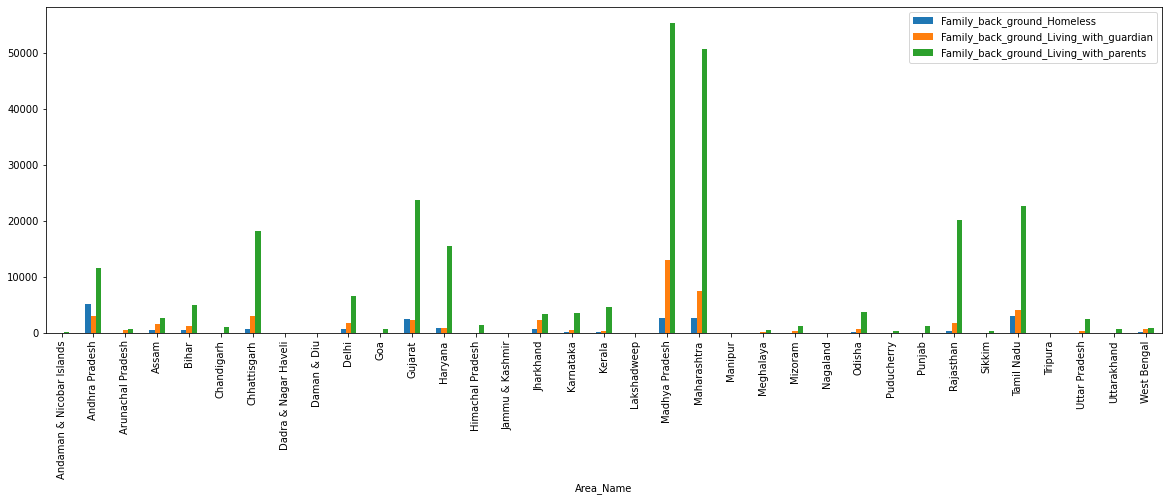

In [ ]:
juv_fam_bg.drop('Family_back_ground_Total',1).plot(kind='bar',figsize=(20,6),x='Area_Name')

* Most of the Juveniles almost in very states were Living with their theri parents when commited crime.

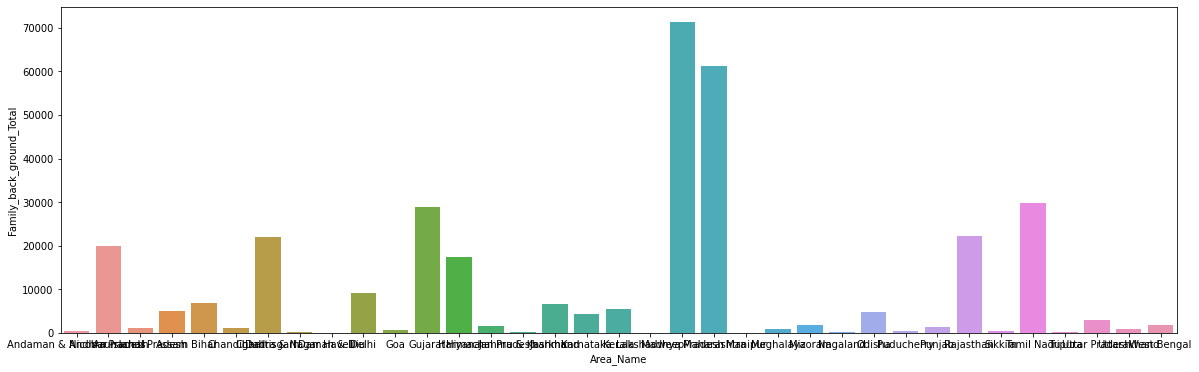

In [ ]:
# where were the most juveniles found in the entire country between 2001 and 2010
plt.figure(figsize=(20,6))
sns.barplot(juv_fam_bg.iloc[:,0],juv_fam_bg.iloc[:,-1])

In [ ]:
# the plotly graph
px.bar(juv_fam_bg.sort_values('Family_back_ground_Total',ascending=False),'Area_Name','Family_back_ground_Total')

___

In [ ]:
juv_ec_setup.sample(5)

,Area_Name,Year,Sub_Group_Name,Economic_Set_up_Annual_Income_250001_to_50000,Economic_Set_up_Annual_Income_upto_Rs_25000,Economic_Set_up_Middle_income_from_100001_to_200000,Economic_Set_up_Middle_income_from_50001_to_100000,Economic_Set_up_Total,Economic_Set_up_Upper_income_above_Rs_300000,Economic_Set_up_Upper_middle_income_from_200001_to_300000
176,Andhra Pradesh,2006,2. Economic Setup,382,1425,14,58,1879,0,0
79,Delhi,2003,2. Economic Setup,119,659,6,18,802,0,0
213,Assam,2007,2. Economic Setup,76,1050,6,23,1155,0,0
315,Andaman & Nicobar Islands,2010,2. Economic Setup,7,17,0,2,26,0,0
93,Mizoram,2003,2. Economic Setup,17,61,1,3,82,0,0


In [ ]:
# let's drop the total and year columns as we will consider the cummulative records from 2001 to 2010.
juv_edu.drop(['Year','Sub_Group_Name'],1,inplace=True)

In [ ]:
juv_edu = juv_edu.groupby('Area_Name').agg(['sum']).reset_index()
juv_edu.columns = juv_edu.columns.droplevel(level=1)

In [ ]:
juv_edu

,Area_Name,Education_Above_Primary_but_below_Matric_or_Higher_Secondary,Education_Illiterate,Education_Matric_or_Higher_Secondary_&_above,Education_Total,Education_Upto_primary
0,Andaman & Nicobar Islands,175,1,21,339,142
1,Andhra Pradesh,3629,8280,1264,19914,6741
2,Arunachal Pradesh,477,199,86,1193,431
3,Assam,1242,1664,591,4953,1456
4,Bihar,2098,2229,428,6871,2116
5,Chandigarh,475,274,122,1177,306
6,Chhattisgarh,6290,5642,1521,22104,8651
7,Dadra & Nagar Haveli,31,16,16,114,51
8,Daman & Diu,18,13,13,48,4
9,Delhi,2233,3648,548,9230,2801


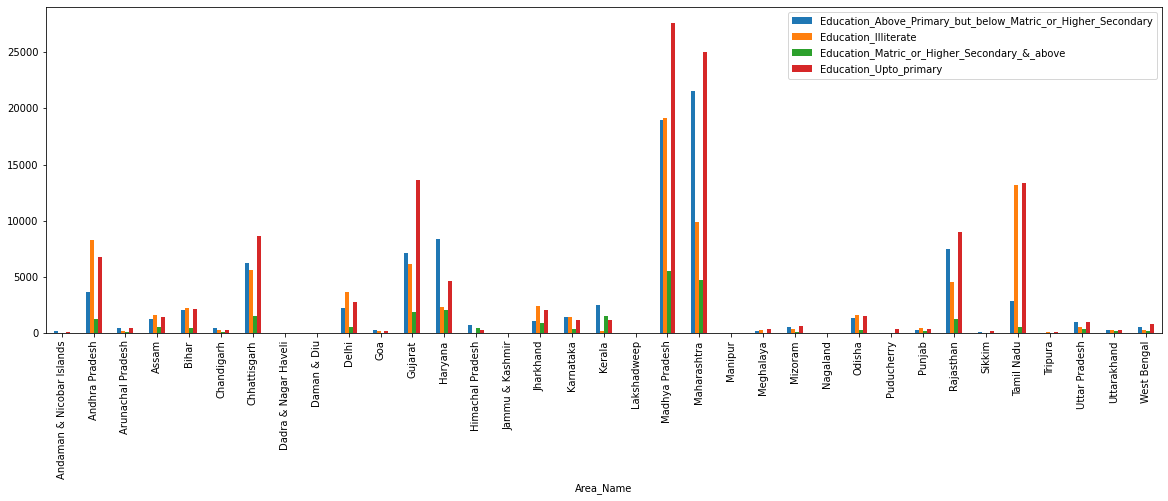

In [ ]:
juv_edu.drop('Education_Total',1).plot(kind='bar',figsize=(20,6),x='Area_Name')

* From the above plot, we can imply that the more higher the education of the juvenile the less crime they commit.
* Education is necessary

In [ ]:
# the plotly graph
px.bar(juv_edu.sort_values('Education_Total',ascending=False),'Area_Name','Education_Total')

___

In [ ]:
juv_ec_setup.sample(5)

,Area_Name,Year,Sub_Group_Name,Economic_Set_up_Annual_Income_250001_to_50000,Economic_Set_up_Annual_Income_upto_Rs_25000,Economic_Set_up_Middle_income_from_100001_to_200000,Economic_Set_up_Middle_income_from_50001_to_100000,Economic_Set_up_Total,Economic_Set_up_Upper_income_above_Rs_300000,Economic_Set_up_Upper_middle_income_from_200001_to_300000
169,Sikkim,2005,2. Economic Setup,0,24,0,0,24,0,0
10,Goa,2001,2. Economic Setup,28,62,1,1,93,1,0
199,Nagaland,2006,2. Economic Setup,0,3,0,0,3,0,0
152,Haryana,2005,2. Economic Setup,546,886,52,139,1623,0,0
260,Jharkhand,2008,2. Economic Setup,138,401,0,10,549,0,0


In [ ]:
# let's drop the total and year columns as we will consider the cummulative records from 2001 to 2010.
juv_ec_setup.drop(['Year','Sub_Group_Name'],1,inplace=True)

In [ ]:
juv_ec_setup = juv_ec_setup.groupby('Area_Name').agg(['sum']).reset_index()
juv_ec_setup.columns = juv_ec_setup.columns.droplevel(level=1)

In [ ]:
juv_ec_setup.head()

,Area_Name,Economic_Set_up_Annual_Income_250001_to_50000,Economic_Set_up_Annual_Income_upto_Rs_25000,Economic_Set_up_Middle_income_from_100001_to_200000,Economic_Set_up_Middle_income_from_50001_to_100000,Economic_Set_up_Total,Economic_Set_up_Upper_income_above_Rs_300000,Economic_Set_up_Upper_middle_income_from_200001_to_300000
0,Andaman & Nicobar Islands,200,74,12,53,339,0,0
1,Andhra Pradesh,3870,14487,213,1311,19914,16,17
2,Arunachal Pradesh,543,390,30,230,1193,0,0
3,Assam,1101,3256,162,343,4953,31,60
4,Bihar,2214,3669,204,767,6871,5,12


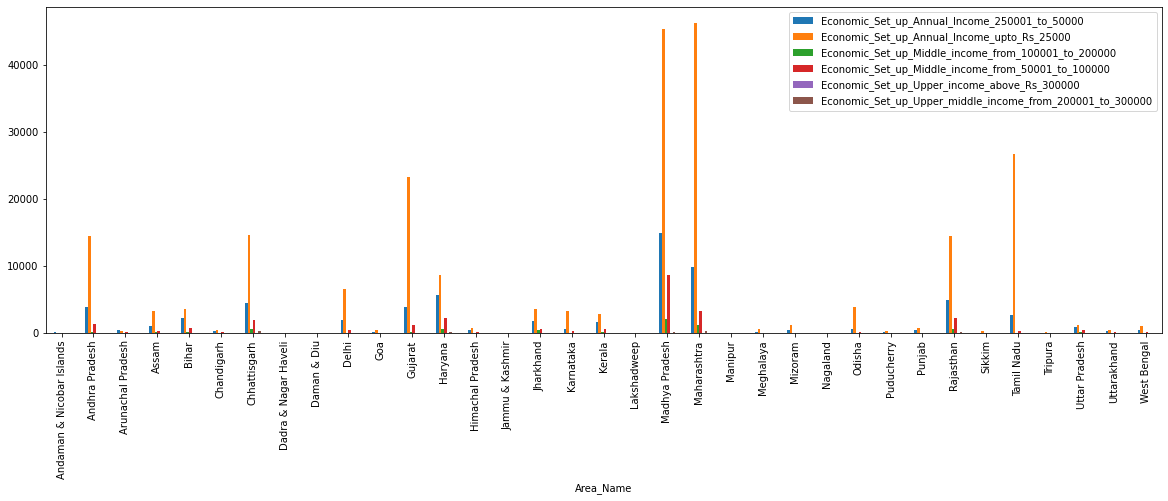

In [ ]:
juv_ec_setup.drop('Economic_Set_up_Total',1).plot(kind='bar',figsize=(20,6),x='Area_Name')

* It's very clear that most of the juveniles have commited crimes because they came form a very low economic background. 

___
___
___

Question 4:
* Age group wise murder victim

In [ ]:
df = pd.read_csv('/content/crime/07_01_Persons_arrested_by_sex_and_age_group_IPC_2014.csv')

In [ ]:
df.head()

,States/UTs,Crime Head,Year,18 and above and below 30 years_Male,18 and above and below 30 years_Female,18 and above and below 30 years_Total,30 and above and below 45 years_Male,30 and above and below 45 years_Female,30 and above and below 45 years_Total,45 and above and below 60 years_Male,45 and above and below 60 years_Female,45 and above and below 60 years_Total,60 years and above_Male,60 years and above_Female,60 years and above_Total,Total Male,Total Female,Total Persons Arrested by age and Sex
0,Andhra Pradesh,1 - Murder (Section 302 IPC),2014,754,59,813,772,113,885,517,48,565,48,0,48,2091,220,2311
1,Andhra Pradesh,2 - Attempt to commit Murder (Section 307 IPC),2014,1175,38,1213,920,43,963,448,16,464,22,0,22,2565,97,2662
2,Andhra Pradesh,3 - Culpable Homicide not amounting to Murder ...,2014,16,2,18,64,4,68,13,1,14,0,0,0,93,7,100
3,Andhra Pradesh,4 - Attempt to commit Culpable Homicide (Secti...,2014,0,0,0,2,0,2,2,0,2,0,0,0,4,0,4
4,Andhra Pradesh,5 - Rape (Section 376 IPC),2014,708,7,715,341,28,369,88,10,98,11,1,12,1148,46,1194


In [ ]:
df.columns

Index(['States/UTs', 'Crime Head', 'Year',
       '18 and above and below 30 years_Male',
       '18 and above and below 30 years_Female',
       '18 and above and below 30 years_Total',
       '30 and above and below 45 years_Male',
       '30 and above and below 45 years_Female',
       '30 and above and below 45 years_Total',
       '45 and above and below 60 years_Male',
       '45 and above and below 60 years_Female',
       '45 and above and below 60 years_Total', '60 years and above_Male',
       '60 years and above_Female', '60 years and above_Total', 'Total Male',
       'Total Female', 'Total Persons Arrested by age and Sex'],
      dtype='object')

In [ ]:
df_murder_victimes = df[df['Crime Head'] == '1 - Murder (Section 302 IPC)' ]

In [ ]:
df_murder_victimes.drop('Crime Head',1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_murder_victimes = df_murder_victimes.set_index(df_murder_victimes['States/UTs']).drop('States/UTs',1)

In [ ]:
df_murder_victimes.drop('Year',1,inplace=True)

In [ ]:
df_murder_victimes = df_murder_victimes.groupby('States/UTs').agg(['sum'])


In [ ]:
df_murder_victimes

,18 and above and below 30 years_Male,18 and above and below 30 years_Female,18 and above and below 30 years_Total,30 and above and below 45 years_Male,30 and above and below 45 years_Female,30 and above and below 45 years_Total,45 and above and below 60 years_Male,45 and above and below 60 years_Female,45 and above and below 60 years_Total,60 years and above_Male,60 years and above_Female,60 years and above_Total,Total Male,Total Female,Total Persons Arrested by age and Sex
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
States/UTs,,,,,,,,,,,,,,,
A & N Islands,1,0,1,5,1,6,2,0,2,0,0,0,8,1,9
Andhra Pradesh,754,59,813,772,113,885,517,48,565,48,0,48,2091,220,2311
Arunachal Pradesh,87,2,89,66,2,68,6,1,7,0,0,0,159,5,164
Assam,1368,16,1384,2058,4,2062,154,0,154,0,0,0,3580,20,3600
Bihar,2348,41,2389,2138,70,2208,755,18,773,44,0,44,5285,129,5414
Chandigarh,20,2,22,15,3,18,5,0,5,0,0,0,40,5,45
Chhattisgarh,606,33,639,581,52,633,245,14,259,34,0,34,1466,99,1565
D&N Haveli,2,0,2,1,0,1,0,0,0,0,0,0,3,0,3


In [ ]:
df_murder_victimes.columns = df_murder_victimes.columns.droplevel(1)
df_murder_victimes

,18 and above and below 30 years_Male,18 and above and below 30 years_Female,18 and above and below 30 years_Total,30 and above and below 45 years_Male,30 and above and below 45 years_Female,30 and above and below 45 years_Total,45 and above and below 60 years_Male,45 and above and below 60 years_Female,45 and above and below 60 years_Total,60 years and above_Male,60 years and above_Female,60 years and above_Total,Total Male,Total Female,Total Persons Arrested by age and Sex
States/UTs,,,,,,,,,,,,,,,
A & N Islands,1,0,1,5,1,6,2,0,2,0,0,0,8,1,9
Andhra Pradesh,754,59,813,772,113,885,517,48,565,48,0,48,2091,220,2311
Arunachal Pradesh,87,2,89,66,2,68,6,1,7,0,0,0,159,5,164
Assam,1368,16,1384,2058,4,2062,154,0,154,0,0,0,3580,20,3600
Bihar,2348,41,2389,2138,70,2208,755,18,773,44,0,44,5285,129,5414
Chandigarh,20,2,22,15,3,18,5,0,5,0,0,0,40,5,45
Chhattisgarh,606,33,639,581,52,633,245,14,259,34,0,34,1466,99,1565
D&N Haveli,2,0,2,1,0,1,0,0,0,0,0,0,3,0,3
Daman & Diu,11,0,11,7,0,7,2,0,2,0,0,0,20,0,20


In [ ]:
df_murder_victimes.columns

Index(['18 and above and below 30 years_Male',
       '18 and above and below 30 years_Female',
       '18 and above and below 30 years_Total',
       '30 and above and below 45 years_Male',
       '30 and above and below 45 years_Female',
       '30 and above and below 45 years_Total',
       '45 and above and below 60 years_Male',
       '45 and above and below 60 years_Female',
       '45 and above and below 60 years_Total', '60 years and above_Male',
       '60 years and above_Female', '60 years and above_Total', 'Total Male',
       'Total Female', 'Total Persons Arrested by age and Sex'],
      dtype='object')

In [ ]:
#drop all the totals
df_murder_victimes.drop(['Total (All India)','Total (UTs)','Total (States)'],inplace=True)

In [ ]:
df_murder_victimes.drop(['Total Male','Total Female','Total Persons Arrested by age and Sex'],1,inplace=True)

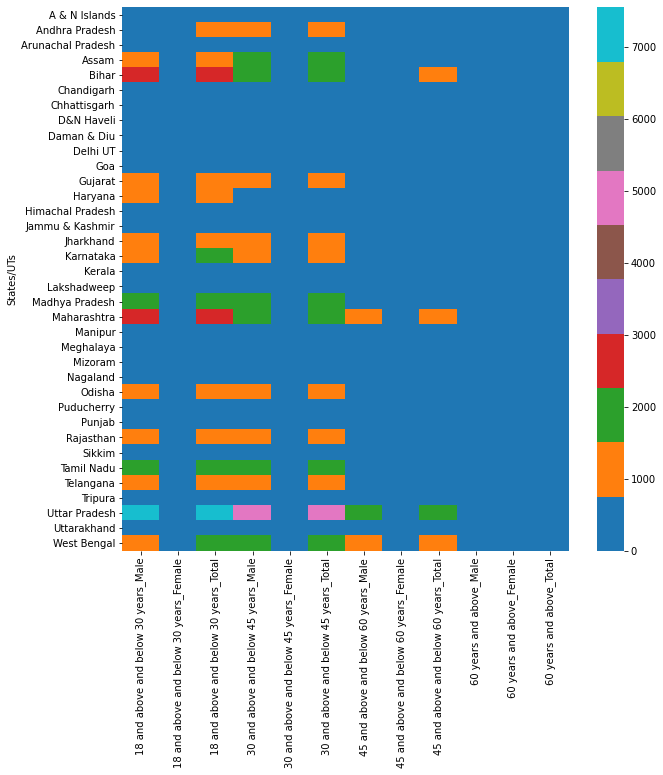

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_murder_victimes,cmap='tab10')

Uttar Pradesh is the state which has most murder victims (thus also cases) by far than any other state or union territory in the country.

In [152]:
df_murder_victimes.idxmax(axis=1)

States/UTs
A & N Islands        30 and above and below 45 years_Total
Andhra Pradesh       30 and above and below 45 years_Total
Arunachal Pradesh    18 and above and below 30 years_Total
Assam                30 and above and below 45 years_Total
Bihar                18 and above and below 30 years_Total
Chandigarh           18 and above and below 30 years_Total
Chhattisgarh         18 and above and below 30 years_Total
D&N Haveli            18 and above and below 30 years_Male
Daman & Diu           18 and above and below 30 years_Male
Delhi UT             18 and above and below 30 years_Total
Goa                   18 and above and below 30 years_Male
Gujarat              18 and above and below 30 years_Total
Haryana              18 and above and below 30 years_Total
Himachal Pradesh     18 and above and below 30 years_Total
Jammu & Kashmir      30 and above and below 45 years_Total
Jharkhand            30 and above and below 45 years_Total
Karnataka            18 and above and below 3

Most of the murders in almost every states in the coutry were of people in between the age of 10 to 45.

___

___

Question:
  * Which state has more number of complaints against police?

In [90]:
df = pd.read_csv('/content/25_Complaints_against_police.csv')

In [91]:
df.head()

,Area_Name,Year,Sub_group,CPA_-_Cases_Registered,CPA_-_Cases_Reported_for_Dept._Action,CPA_-_Complaints/Cases_Declared_False/Unsubstantiated,CPA_-_Complaints_Received/Alleged,CPA_-_No_of_Departmental_Enquiries,CPA_-_No_of_Magisterial_Enquiries,CPA-_Cases_Sent_for_Trials/Charge-sheeted,CPA-_No_of_Judicial_Enquiries,CPB_-_Police_Personnel_Acquitted,CPB_-_Police_Personnel_Convicted,CPB_-_Police_Personnel_sent_up_for_Trial,CPB_-_Police_Personnel_Trial_Completed,CPB-_Police_Personnel_Cases_Withdrawn_or_Otherwise_disposed_of,CPC_-_Police_personnel_Cases_Trial_Completed,CPC_-_Police_Personnel_Cases_Withdrawn_or_Otherwise_disposed_of,CPC_-_Police_Personnel_Disciplinary_Action_Initiated,CPC_-_Police_Personnel_Dismissal/Removal_from_Service,CPC_-_Police_Personnel_Major_Punishment_awarded,CPC_-_Police_Personnel_Minor_Punishment_awarded
0,Andaman & Nicobar Islands,2001,Complaints Against Police Personnel,10,4,0,10,4,0,5,0,1,0,5,1,0,6,25,73,2,11,20
1,Andhra Pradesh,2001,Complaints Against Police Personnel,3078,72,109,3229,160,2969,3039,23,12,3,92,15,16,23,476,1506,47,248,1085
2,Arunachal Pradesh,2001,Complaints Against Police Personnel,24,39,5,54,44,0,17,0,0,0,17,0,1,8,43,107,4,17,15
3,Assam,2001,Complaints Against Police Personnel,17,3,1,52,52,3,9,1,1,0,7,1,1,0,7,144,5,61,102
4,Bihar,2001,Complaints Against Police Personnel,1,1,12,125,3,15,18,81,0,0,81,0,6,537,141,1385,33,470,1557


In [104]:
df_compaint_on_police = df[['Area_Name','CPA_-_Cases_Registered']]

In [105]:
df_compaint_on_police

,Area_Name,CPA_-_Cases_Registered
0,Andaman & Nicobar Islands,10
1,Andhra Pradesh,3078
2,Arunachal Pradesh,24
3,Assam,17
4,Bihar,1
...,...,...
345,Tamil Nadu,107
346,Tripura,28
347,Uttar Pradesh,8701
348,Uttarakhand,15


In [110]:
df_compaint_on_police = df_compaint_on_police.groupby('Area_Name').agg(['sum'])

In [111]:
df_compaint_on_police.columns = df_compaint_on_police.columns.droplevel(1)

In [120]:
df_compaint_on_police = df_compaint_on_police.sort_values('CPA_-_Cases_Registered',ascending=False)

In [121]:
px.bar(df_compaint_on_police,df_compaint_on_police.index,df_compaint_on_police['CPA_-_Cases_Registered'])

___
___
___

Question:
  * Most cases against women

In [131]:
df = pd.read_csv('/content/crime/42_District_wise_crimes_committed_against_women_2014.csv')

In [132]:
df.head()

,States/UTs,District,Year,Rape,Custodial Rape,Custodial_Gang Rape,Custodial_Other Rape,Rape other than Custodial,Rape_Gang Rape,Rape_Others,Attempt to commit Rape,Kidnapping & Abduction_Total,Kidnaping & Abduction,Kidnaping & Abduction in order to Murder,Kidnapping for Ransom,Kidnapping & Abduction of Women to compel her for marriage,Kidnaping & Abduction_Others,Dowry Deaths,Assault on Women with intent to outrage her Modesty_Total,Sexual Harassment,Assault on women with intent to Disrobe,Voyeurism,Stalking,Others,Insult to the Modesty of Women_Total,At Office premises,In places related to work,In Public Transport system,In other Places,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Grievous Hurt,Hurt,Acid attack,Attempt to Acid Attack,Deaths caused with intent to cause miscarriage,Causing miscarriage without consent of women,Dacoity_Total,Dacoity with Murder,Other Dacoity,Robbery,Arson,HumanTrafficking,Abetment of Suicides of Women,UnNatural Offences,Other IPC Crimes,"Dowry Prohibition Act, 1961","Indecent Representation of Women (P) Act, 1986","Commission of Sati Prevention Act, 1987","Protection of Women from Domestic Violence Act, 2005",Immoral Traffic Prevention Act,ITP Under Section 5,ITP Under Section 6,ITP Under Section 7,ITP Under Section 8,ITP Under Other Sections,Other SLL Crimes against Women,Total Crimes against Women
0,Andhra Pradesh,Anantapur,2014,35,0,0,0,35,0,35,1,106,0,0,0,88,18,25,436,82,34,4,80,236,26,0,0,0,26,165,0,50,20,1,0,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,229,0,0,0,0,0,0,0,0,0,0,1097
1,Andhra Pradesh,Chittoor,2014,32,0,0,0,32,1,31,0,34,3,0,1,28,2,17,135,0,0,0,0,135,94,0,0,0,94,278,0,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,607
2,Andhra Pradesh,Cuddapah,2014,28,0,0,0,28,0,28,4,16,0,0,0,11,5,16,215,212,0,0,0,3,12,1,11,0,0,91,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,175,0,0,0,5,0,0,0,0,5,0,609
3,Andhra Pradesh,East Godavari,2014,85,0,0,0,85,0,85,18,25,0,0,0,0,25,7,519,159,61,11,55,233,62,0,0,0,62,464,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,22,0,0,0,16,0,0,0,0,16,0,1277
4,Andhra Pradesh,Guntakal Railway,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [133]:
# this dataset containes all the records all crimes commited in the 2014 against women

In [141]:
df_women = df[['States/UTs','Total Crimes against Women']]

In [143]:
df_women = df_women.groupby('States/UTs').agg('sum')

In [144]:
df_women

,Total Crimes against Women
States/UTs,
A&N Islands,280
Andhra Pradesh,35074
Arunachal Pradesh,792
Assam,39218
Bihar,36416
Chandigarh,1118
Chhattisgarh,22100
D&N Haveli,50
Daman & Diu,36


In [147]:
df_women = df_women.sort_values('Total Crimes against Women',ascending=False)

df_women

,Total Crimes against Women
States/UTs,
Madhya Pradesh,114202
Uttar Pradesh,104818
Maharashtra,98334
West Bengal,96788
Rajasthan,64802
Delhi UT,44510
Assam,39218
Odisha,37128
Bihar,36416


In [149]:
px.bar(df_women,df_women.index,df_women['Total Crimes against Women'])

* The most of the crimes againsts women in 2014 ware recorded in Madhy Pradesh